No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_54996/1406082773.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


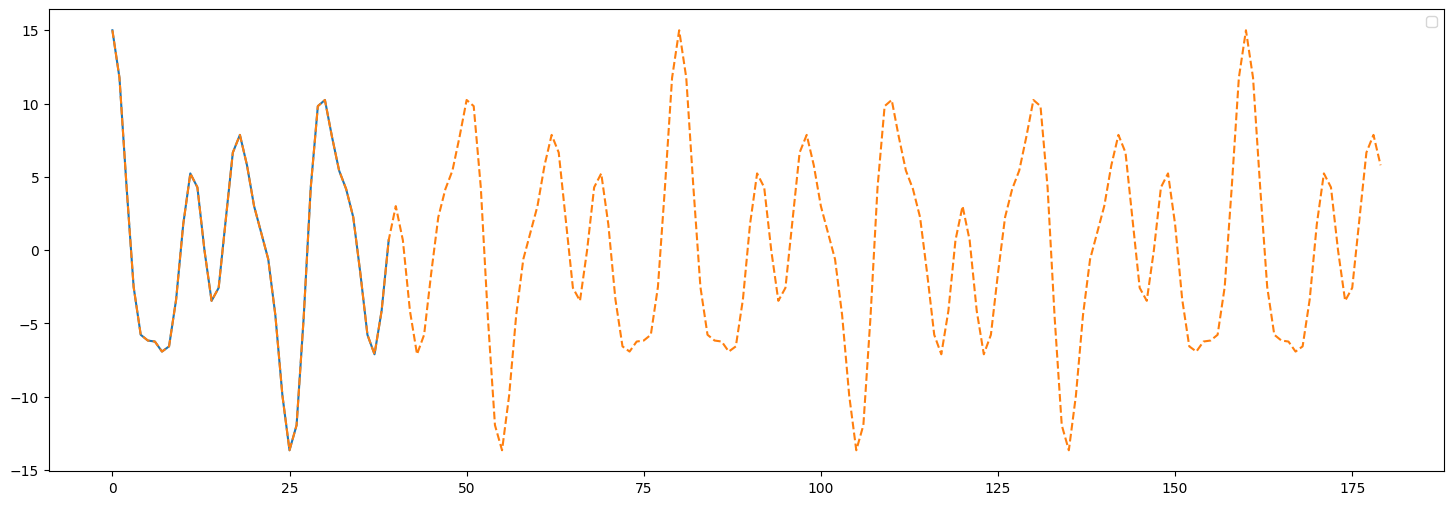

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# A1, A2, A3 = 6, 6, 3
# F1, F2, F3 = 5, 8, 14
A = np.array([6, 6, 3])
F = np.array([5, 8, 14])
FS = 80
T = 1 / FS


def p(n):
    return sum(A * np.cos(2 * np.pi * F * n * T))


ns1 = np.arange(0, 40)
ns2 = np.arange(0, 0 + 180)
ps1 = np.array([p(n) for n in ns1])
ps2 = np.array([p(n) for n in ns2])


fig = plt.figure(figsize=(18, 6))
plt.plot(ns1, ps1)
plt.plot(ns2, ps2, '--')
plt.legend()
fig.show()

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_54996/3650375823.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


([4.999299985999722, 7.999359987199743, 13.999479989599797],
 [(5.986024176331511+0.0895033527434344j),
  (5.955048785916909-0.08944415666665842j),
  (3.127704800618774-0.21918539050477456j)])

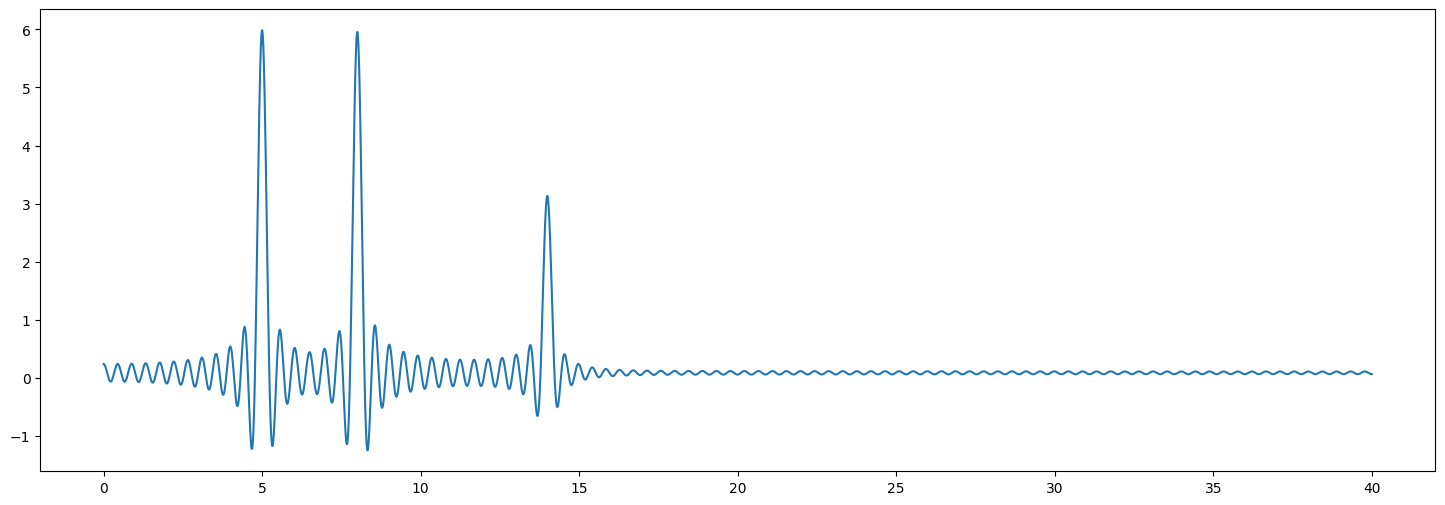

In [26]:
SAMPLE_N = 50000


def dtft(xs):
    ws = np.linspace(-np.pi, np.pi, SAMPLE_N)
    ns = np.arange(len(xs))
    cap_xs = []
    for w in ws:
        cap_xs.append(sum(xs * np.exp(-1j * w * ns)))
    return ws, np.array(cap_xs)


def __draw(xs, ys):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(xs, ys)
    fig.show()


ws, cap_xs = dtft(ps2)
cap_xs = cap_xs / len(ps2) * 2


def dig_w_to_ana_f(w):
    return w / 2 / np.pi * FS


l = len(ws) // 2
__draw(dig_w_to_ana_f(ws[l:]), cap_xs[l:])

ana_fs = dig_w_to_ana_f(ws)


def find_most_idx_close_to(value, ls):
    return np.argmin(abs(ls - value))


idx = [find_most_idx_close_to(ana_fs, i) for i in F]
ans_fs = [ana_fs[i] for i in idx]
ans_as = [cap_xs[i] for i in idx]
ans_fs, ans_as